In [1]:
using yinsGraph

INFO: Loading help data...


In [65]:
include("sampler.jl")
include("randTrees.jl")
include("solvers.jl")

augmentTree (generic function with 1 method)

In [99]:
a = grid2(30,30,isotropy=10);
@time t = randishKruskal(a)
@time st = compStretches(t,a);
sum(st)/nnz(a)

elapsed time: 0.000834213 seconds (571760 bytes allocated)
elapsed time: 0.000241986 seconds (355584 bytes allocated)


7.343678160919559

In [98]:
t

40000x40000 sparse matrix with 79998 Float64 entries:
	[201  ,     1]  =  10.0
	[202  ,     2]  =  10.0
	[203  ,     3]  =  10.0
	[204  ,     4]  =  10.0
	[205  ,     5]  =  10.0
	[206  ,     6]  =  10.0
	[207  ,     7]  =  10.0
	[9    ,     8]  =  1.0
	[208  ,     8]  =  10.0
	[8    ,     9]  =  1.0
	⋮
	[39791, 39991]  =  10.0
	[39792, 39992]  =  10.0
	[39793, 39993]  =  10.0
	[39794, 39994]  =  10.0
	[39795, 39995]  =  10.0
	[39796, 39996]  =  10.0
	[39997, 39996]  =  1.0
	[39996, 39997]  =  1.0
	[39798, 39998]  =  10.0
	[39799, 39999]  =  10.0
	[39800, 40000]  =  10.0

In [100]:
@time at = augmentTree(t,a,convert(Int,4*round(sqrt(size(a)[1]))))

elapsed time: 0.000850124 seconds (772648 bytes allocated)


900x900 sparse matrix with 2110 Float64 entries:
	[2  ,   1]  =  1.0
	[31 ,   1]  =  10.0
	[1  ,   2]  =  1.0
	[32 ,   2]  =  10.0
	[33 ,   3]  =  10.0
	[5  ,   4]  =  1.0
	[34 ,   4]  =  10.0
	[4  ,   5]  =  1.0
	[35 ,   5]  =  1.0
	[36 ,   6]  =  10.0
	⋮
	[894, 893]  =  1.0
	[864, 894]  =  10.0
	[893, 894]  =  1.0
	[865, 895]  =  10.0
	[896, 895]  =  1.0
	[866, 896]  =  10.0
	[895, 896]  =  1.0
	[867, 897]  =  10.0
	[868, 898]  =  10.0
	[869, 899]  =  10.0
	[870, 900]  =  10.0

In [82]:
la = lap(a)
la[1,1] = la[1,1] + 1
lat = lap(at)
lat[1,1] = lat[1,1] + 1;


In [83]:
@time F = cholfact(lat)

elapsed time: 0.059691726 seconds (17253024 bytes allocated)



CHOLMOD factor:  :  40000-by-40000
  scalar types: SuiteSparse_long, real, double
  simplicial, LDL'.
  ordering method used: AMD
         0:30244
         1:30044
         2:30045
         3:29645
         4:29845
         5:29844
         6:29644
         7:29444
    ...
     39996:33252
     39997:36659
     39998:38445
     39999:17852
  col: 0 colcount: 2
  col: 1 colcount: 2
  col: 2 colcount: 2
  col: 3 colcount: 2
  col: 4 colcount: 2
  col: 5 colcount: 2
  col: 6 colcount: 2
  col: 7 colcount: 2
    ...
  col: 39996 colcount: 4
  col: 39997 colcount: 3
  col: 39998 colcount: 2
  col: 39999 colcount: 1
monotonic: 1
 nzmax 106610.
  col 0: nz 2 start 0 end 2 space 2 free 0:
         0: 10
         1: -1
  col 1: nz 2 start 2 end 4 space 2 free 0:
         1: 10
         5: -1
  col 2: nz 2 start 4 end 6 space 2 free 0:
         2: 10
         4: -1
  col 3: nz 2 start 6 end 8 space 2 free 0:
         3: 10
         4: -1
    ...
  col 39997: nz 3 start 106604 end 106607 space 3

In [84]:
@show nnz(lat)
n = size(la)[1]
b = randn(n);


nnz(lat) => 122484


In [9]:
using IterativeSolvers

In [85]:
@time y = cg(la,b)
norm(b - la*y[1])


elapsed time: 9.636141236 seconds (3742343800 bytes allocated, 47.59% gc time)


1.7507940714932809e-9

In [56]:
y[2]

LoadError: `getindex` has no method matching getindex(::ConvergenceHistory{Float64,Array{Float64,1}}, ::Int64)
while loading In[56], in expression starting on line 1

In [86]:
@time z = cg(la, b, F)
norm(b-la*z[1])

elapsed time: 3.259397753 seconds (1008172776 bytes allocated, 36.32% gc time)


1.7596799772000927e-9

In [95]:
b = randn(n)
b = b / norm(b)
for i in 1:10
    b = F \ (la * b)
    @show norm(b)
    b = b / norm(b)
end

norm(b) => 188.56045708877036
norm(b) => 1144.690743052187
norm(b) => 1088.9905275926415
norm(b) => 1113.5891505619088
norm(b) => 1135.433579673152
norm(b) => 1147.7445146962941
norm(b) => 1154.6785094547201
norm(b) => 1158.841510212716
norm(b) => 1161.555894370568
norm(b) => 1163.4875149491486


In [96]:
E = eigs(x -> (F \ la * x))

LoadError: `zero` has no method matching zero(::Type{Any})
while loading In[96], in expression starting on line 1

In [58]:
@time fla = cholfact(la);

elapsed time: 0.331130866 seconds (26439840 bytes allocated, 16.03% gc time)


In [60]:
@time w = fla \ b
norm(b - la*w)

elapsed time: 0.094227263 seconds (848 bytes allocated)


6.985945904433565e-10

In [62]:
@profile at = augmentTree(t,a,convert(Int,round(sqrt(size(a)[1]))))

40000x40000 sparse matrix with 80720 Float64 entries:
	[2    ,     1]  =  1.0
	[201  ,     1]  =  10.0
	[1    ,     2]  =  1.0
	[202  ,     2]  =  10.0
	[203  ,     3]  =  10.0
	[204  ,     4]  =  10.0
	[205  ,     5]  =  10.0
	[7    ,     6]  =  1.0
	[206  ,     6]  =  10.0
	[6    ,     7]  =  1.0
	⋮
	[39794, 39994]  =  10.0
	[39795, 39995]  =  10.0
	[39996, 39995]  =  1.0
	[39796, 39996]  =  10.0
	[39995, 39996]  =  1.0
	[39797, 39997]  =  10.0
	[39798, 39998]  =  10.0
	[39999, 39998]  =  1.0
	[39799, 39999]  =  10.0
	[39998, 39999]  =  1.0
	[39800, 40000]  =  10.0

In [103]:
function augTreeSolver{Tv,Ti}(ddmat::SparseMatrixCSC{Tv,Ti})

  adjmat = -triu(ddmat,1)
  adjmat = adjmat + adjmat'

  tree = randishKruskal(adjmat)

  augtree = augmentTree(tree,adjmat,convert(Int,round(sqrt(size(a)[1]))))

  n = size(ddmat)[1]
  Dx = spdiagm(ddmat*ones(n))

  augDD = Dx + spdiagm(augtree*ones(n)) - augtree

  F = cholfact(augDD)

  f(b) = cg(ddmat, b, F)
    
  return f

end


augTreeSolver (generic function with 1 method)

In [104]:
f = augTreeSolver(la)

f (generic function with 1 method)

In [105]:
n = size(la)[1]

40000

In [106]:
b = randn(n)
x = f(b)

([-66.5344,-81.6052,-89.1475,-93.7599,-97.245,-100.566,-102.976,-104.794,-107.133,-108.909  …  -190.109,-189.512,-189.678,-189.597,-189.064,-188.773,-188.248,-187.774,-187.933,-188.206],ConvergenceHistory{Float64,Array{Float64,1}}(true,1.777407426937412e-9,1196,[212.029,221.749,232.732,245.583,254.819,261.442,269.575,277.319,285.484,292.504  …  2.1297e-9,2.06545e-9,2.04968e-9,1.9827e-9,1.93115e-9,1.89823e-9,1.87439e-9,1.84846e-9,1.80941e-9,1.71978e-9]))

In [108]:
norm(la*x[1]-b)

2.2275038021700517e-9

In [15]:
y[1]

2500-element Array{Float64,1}:
  21.1543
  46.5351
 105.275 
 162.73  
 159.814 
 162.051 
 172.016 
 175.008 
 182.641 
 254.736 
 256.94  
 261.332 
 262.417 
   ⋮     
 327.247 
 327.81  
 329.673 
 330.675 
 333.242 
 335.886 
 335.923 
 268.899 
 272.405 
 275.596 
 276.709 
 275.011 

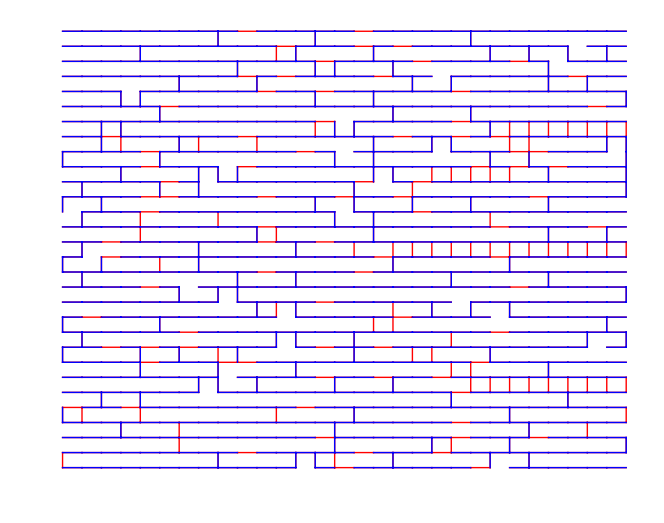

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x11e508d90>

In [102]:
(x,y) = grid2coords(30);
plotGraph(at,x,y,"red",dots=false)
plotGraph(t,x,y,dots=false)

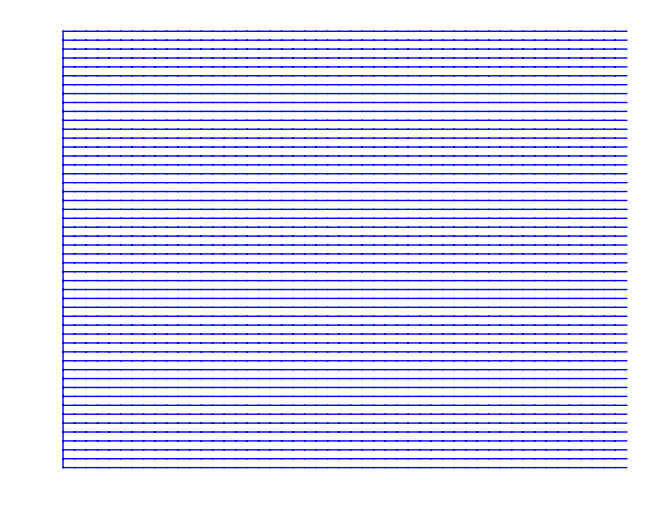

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x111e9c450>

In [14]:
x, y = grid2coords(50)
plotGraph(t2, x, y, dots = false)